In [2]:
import pandas as pd

# Tidy dataset I

# Load and tidy
data_table = pd.read_csv('../data/raw/child-motality.csv')
# Use pd.melt(), pd.pivot_table(), or custom code
tidy_data_table = data_table.melt(id_vars=['geo', 'name'], var_name='year', value_name='mortality_rate')


In [3]:
print(tidy_data_table.head())

   geo         name  year  mortality_rate
0  afg  Afghanistan  1800          468.58
1  ago       Angola  1800          485.68
2  alb      Albania  1800          375.20
3  and      Andorra  1800             NaN
4  are          UAE  1800          434.46


In [4]:
# Tidy dataset II

# Load and tidy
data_gpd_table = pd.read_csv('../data/raw/gdp-data.csv')
# Use pd.melt(), pd.pivot_table(), or custom code
tidy_gpd_data_table = data_gpd_table.melt(id_vars=['geo', 'name'], var_name='year', value_name='gdp_capita')

In [5]:
print(tidy_gpd_data_table.head())

   geo         name  year  gdp_capita
0  afg  Afghanistan  1800   560.88817
1  ago       Angola  1800   435.23259
2  alb      Albania  1800   547.53369
3  and      Andorra  1800  1598.53128
4  are          UAE  1800  1332.77712


In [6]:
# Merge 2 datasets
merged_data_table = pd.merge(tidy_data_table, tidy_gpd_data_table, on=['geo','name','year'], how='inner')

In [7]:
print(merged_data_table.head())

   geo         name  year  mortality_rate  gdp_capita
0  afg  Afghanistan  1800          468.58   560.88817
1  ago       Angola  1800          485.68   435.23259
2  alb      Albania  1800          375.20   547.53369
3  and      Andorra  1800             NaN  1598.53128
4  are          UAE  1800          434.46  1332.77712


<Axes: xlabel='gdp_capita', ylabel='mortality_rate'>

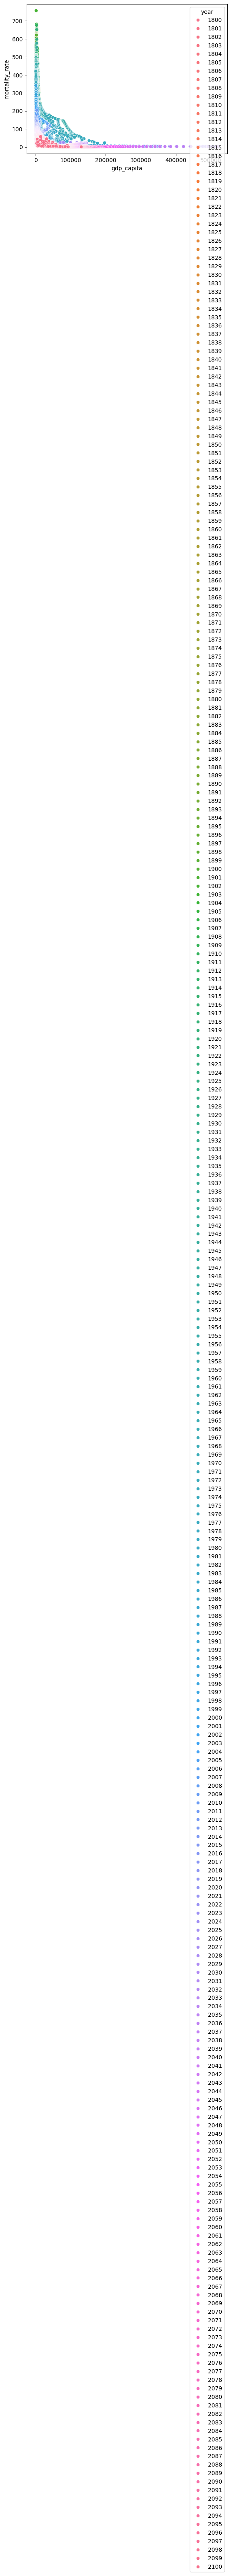

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# child mortality rate (Y-axis) versus GDP per capita (X-axis)
sns.scatterplot(data=merged_data_table, x='gdp_capita', y='mortality_rate', hue='year')

<Axes: xlabel='gdp_capita', ylabel='mortality_rate'>

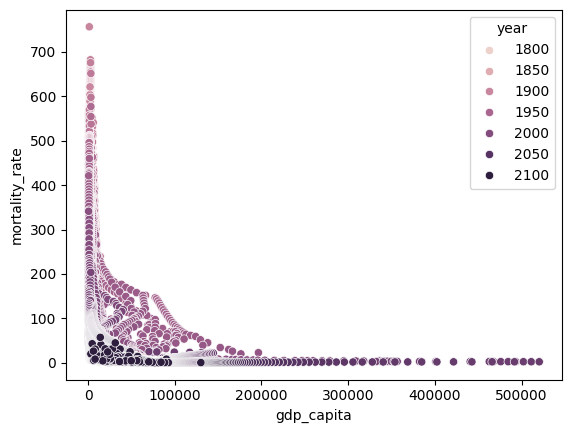

In [11]:
# child mortality rate (Y-axis) versus GDP per capita (X-axis)
merged_data_table['year'] = merged_data_table['year'].astype(int)
sns.scatterplot(data=merged_data_table, x='gdp_capita', y='mortality_rate', hue='year')


<Axes: xlabel='gdp_capita', ylabel='mortality_rate'>

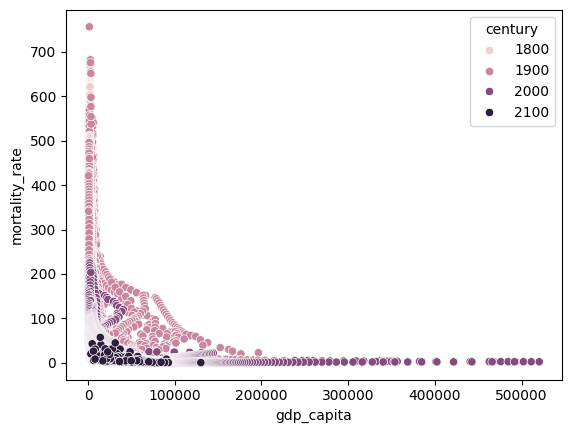

In [13]:
# update the plot to show the century instead of year

# add a new column 'century' for the new viz
merged_data_table['century'] = (merged_data_table['year'] // 100) * 100
sns.scatterplot(data=merged_data_table, x='gdp_capita', y='mortality_rate', hue='century')